In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [20]:
methods = ['SimbaV2', 'Simba', 'TD7', 'TD-MPC2', 'BRO', 'SAC']

# Create an empty DataFrame with the specified columns
df = pd.DataFrame(columns=['methods', 'time', 'performance'])

#### SimbaV2

In [21]:
rows = [] 
# rr1: 0.7 / 0.2
rows.append({
    'methods': "SimbaV2",
    'time': 0.9,
    'performance': 0.848,
    'std': 0.052,
})
rows.append({
    'methods': "SimbaV2",
    'time': 1.6,
    'performance': 0.892,
    'std': 0.032,
})
rows.append({
    'methods': "SimbaV2",
    'time': 3.0,
    'performance': 0.899,
    'std': 0.042,
})
rows.append({
    'methods': "SimbaV2",
    'time': 5.8,
    'performance': 0.911,
    'std': 0.044
})

#### Simba

In [22]:
# rr1: 0.68 / 0.2
rows.append({
    'methods': "Simba",
    'time': 0.88,
    'performance': 0.765,
    'std': 0.033,
})
rows.append({
    'methods': "Simba",
    'time': 1.56,
    'performance': 0.785,
    'std': 0.028,
})
rows.append({
    'methods': "Simba",
    'time': 2.92,
    'performance': 0.804,
    'std': 0.030,
})
rows.append({
    'methods': "Simba",
    'time': 5.64,
    'performance': 0.818,
    'std': 0.043,
})

#### Other baselines

In [23]:
rows.append({
    'methods': "TD-MPC2",
    'time': 2.31,
    'performance': 0.749,
    'std': 0.104,
})

rows.append({
    'methods': "TD7",
    'time': 1.05,
    'performance': 0.617,
    'std': 0.107,
})

#rows.append({
#    'methods': "DreamerV3",
#    'time': 5.0,
#    'performance': 0.397,
#})

rows.append({
    'methods': "BRO",
    'time': 1.73,
    'performance': 0.731,
    'std': 0.028,
})

# RR10
rows.append({
    'methods': "BRO",
    'time': 7.73,
    'performance': 0.809,
    'std': 0.031,
})

#rows.append({
#    'methods': "SAC",
#    'time': 5.0,
#    'performance': 0.450,
#})

### Aggregation

In [24]:
new_df = pd.DataFrame(rows)
df = pd.concat([df, new_df], ignore_index=True)
df

/tmp/ipykernel_98750/3599311929.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df], ignore_index=True)


,methods,time,performance,std
0,SimbaV2,0.90,0.848,0.052
1,SimbaV2,1.60,0.892,0.032
2,SimbaV2,3.00,0.899,0.042
3,SimbaV2,5.80,0.911,0.044
4,Simba,0.88,0.765,0.033
5,Simba,1.56,0.785,0.028
6,Simba,2.92,0.804,0.030
7,Simba,5.64,0.818,0.043
8,TD-MPC2,2.31,0.749,0.104
9,TD7,1.05,0.617,0.107


In [25]:
# Define the number of ticks and gridlines
def set_identical_grid(ax, num_x_ticks=10, num_y_ticks=10):
    ax.xaxis.set_major_locator(plt.MaxNLocator(num_x_ticks, integer=True))
    ax.yaxis.set_major_locator(plt.MaxNLocator(num_y_ticks, integer=True))
    ax.xaxis.grid(True, linestyle='--', linewidth=0.7)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.7)
    ax.set_xticks(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num_x_ticks))
    ax.set_yticks(np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], num_y_ticks)[:-1])

def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.get_xaxis().tick_bottom()
    #ax.get_yaxis().tick_left()

In [26]:
colors = {
    'SimbaV2': "#648EF6",
    'Simba': "#F6CC64",
    'TD-MPC2': "#E6E6E6",
    'TD7': "#E6E6E6",
    'BRO': sns.color_palette("RdPu",20)[7],
    'SAC': "#E6E6E6",
}

colors = {
    'SimbaV2': "#648EF6",
    'Simba': "#F6CC64",
    'TD-MPC2': "#A0C882",  # Soft Sage Green (Alternative 1)
    'TD7': "#E6B98C",
    'BRO': "#F0A5AF",  # Soft Pink
}

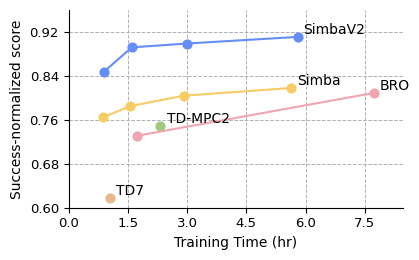

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(4.3, 2.7))


x_lim_min = 0
x_lim_max = 7.5
y_lim_min = 0.6
y_lim_max = 1.0
num_x_ticks=6
num_y_ticks=6

title = '57 continuous control tasks'
y_label = 'Success-normalized score'

for method in methods:
    method_data = df[df['methods'] == method]
    if not method_data.empty:
        ax.scatter(method_data['time'], method_data['performance'], 
                    color=colors[method], label=method, s=40, zorder=10)
        
        ax.plot(
            method_data['time'], 
            method_data['performance'],
            color=colors[method],
            zorder=10,
        )
        """
        ax.errorbar(
            method_data['time'], 
            method_data['performance'],
            yerr=method_data['std'],
            color=colors[method],
            capsize=2,
        ) 
        """

        # Annotate each point with its method name
        x_interval = x_lim_max - x_lim_min
        y_interval = y_lim_max - y_lim_min

        x_annot = method_data['time'].values[-1]
        y_annot = method_data['performance'].values[-1]

        if method == 'TD-MPC2':
            ax.text(
                x_annot + x_interval * 0.025, 
                y_annot + y_interval * 0.015, 
                method, 
                fontsize=10, 
                ha='left',
                zorder=15,
            )
        else:
            ax.text(
                x_annot + x_interval * 0.02, 
                y_annot + y_interval * 0.015, 
                method, 
                fontsize=10, 
                ha='left'
            )

    #ax.set_title(title + '\n', fontsize=11.5, y= 0.99) #, fontweight='semibold')
    ax.set_xlabel('Training Time (hr)')
    ax.set_ylabel(y_label)
    ax.set_xlim(0, x_lim_max)
    ax.set_ylim(y_lim_min, y_lim_max)
    set_identical_grid(ax, num_x_ticks=num_x_ticks, num_y_ticks=num_y_ticks)
    sns.despine(ax=ax)
            
    ax.set_ylim(y_lim_min, y_lim_max - (y_lim_max-y_lim_min)*0.1)
    ax.set_xlim(x_lim_min, x_lim_max + (x_lim_max-x_lim_min)*0.13)

ax.tick_params(axis='both', which='major', labelsize=9.5)
"""
# Create a combined legend
handles, labels = [], []
for method in methods:
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[list(methods).index(method)], markersize=10, label=method))
fig.legend(handles=handles, labels=methods, loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=6)
"""
# Adjust layout
plt.tight_layout()
plt.savefig("compute_vs_performance.pdf",bbox_inches='tight')
#plt.subplots_adjust(wspace=0.4)
#plt.savefig("sec5_off_policy_scatter.pdf",bbox_inches='tight')
#plt.show()